# Logistics Regression (Binary Classfication)

In [786]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [787]:
# from sklearn.datasets import make_classification

# # two features
# X, y = make_classification(n_samples=20, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)
# X.shape, y.shape

In [788]:
from sklearn.datasets import make_classification
import pandas as pd

# Generate a binary classification dataset with one feature
X, y = make_classification(
    n_samples=50,        # Number of samples
    n_features=1,        # Total number of features
    n_informative=1,     # Number of informative features
    n_redundant=0,       # Number of redundant features
    n_classes=2,         # Number of classes (binary classification)
    n_clusters_per_class=1,  # Ensure clusters fit within n_informative constraint
    random_state=42      # Random state for reproducibility
)

# # Combine features and labels into a DataFrame for better visualization
# data = pd.DataFrame({'Feature': X.flatten(), 'Label': y})
# data
X.shape, y.shape

((50, 1), (50,))

In [789]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape

((35, 1), (35,))

In [790]:
# 1 => pass
# 0 => Fail
y_labels = np.where(y_train == 0,"Fail", "Pass")
y_labels.shape

(35,)

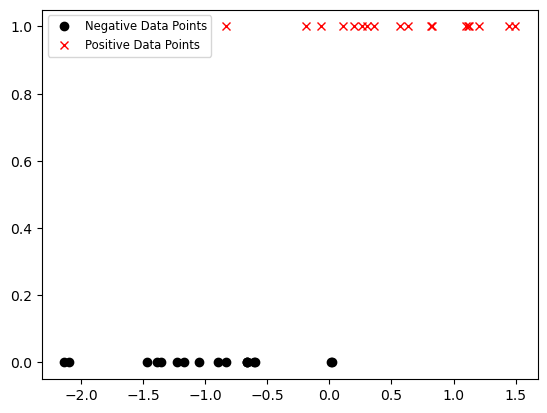

In [791]:
# plt.scatter(X_train, y_train, label="Train Data points", color="black")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "ko", label="Negative Data Points")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "rx", label="Positive Data Points")
plt.legend(prop={"size":"small"})
plt.show()

# Sigmoid Activation function

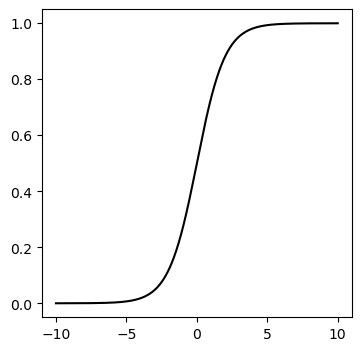

In [792]:
x_points = np.linspace(-10,10, 2000)
y_points = 1 / (1 + np.e **(-(x_points)))
x_points.shape, y_points.shape
plt.figure(figsize=(4,4))
plt.plot(x_points, y_points, "k-")

In [793]:
# w0 = 1
# w1 = 10
# z = w0 + w1 * X

# y_points = 1 / (1 + np.e **(-(z)))

# plt.figure(figsize=(4,4))

# plt.plot(X_train[y_train == 0], y_train[y_train == 0], "ko", label="Negative Data Points")
# plt.plot(X_train[y_train == 1], y_train[y_train == 1], "rx", label="Positive Data Points")
# plt.plot(X, y_points, "o", color="orange")
# # plt.legend(prop={"size":"small"})
# plt.show()



In [794]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
logis = LogisticRegression()
logis.fit(X_train, y_train)
y_pred_train = logis.predict(X_train)
print("Parameters ::", logis.intercept_, logis.coef_)
print("Accuracy :: ", accuracy_score(y_train, y_pred_train))
print("Confusion Matrix :: ", confusion_matrix(y_train, y_pred_train), sep="\n")
print("Classifivcation Report :: ", classification_report(y_train, y_pred_train))


Parameters :: [0.49509006] [[2.17693482]]
Accuracy ::  0.9142857142857143
Confusion Matrix :: 
[[15  2]
 [ 1 17]]
Classifivcation Report ::                precision    recall  f1-score   support

           0       0.94      0.88      0.91        17
           1       0.89      0.94      0.92        18

    accuracy                           0.91        35
   macro avg       0.92      0.91      0.91        35
weighted avg       0.92      0.91      0.91        35



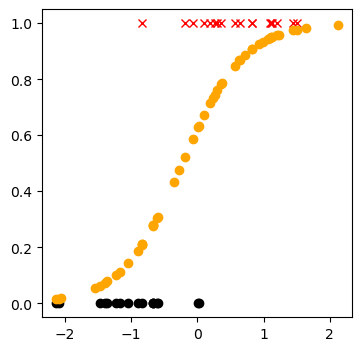

In [795]:
w0 = 0.49509006
w1 = 2.17693482
z = w0 + w1 * X

y_points = 1 / (1 + np.e **(-(z)))


plt.figure(figsize=(4,4))

plt.plot(X_train[y_train == 0], y_train[y_train == 0], "ko", label="Negative Data Points")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "rx", label="Positive Data Points")
plt.plot(X, y_points, "o", color="orange")

# plt.legend(prop={"size":"small"})
plt.show()



In [796]:
# print(logis.predict_proba(X_test))
# print(logis.predict(X_test))


# Hyparameter Tuning using GridSearchCV

`class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)`

In [797]:
model = LogisticRegression()

In [798]:
penalty = ["l1", "l2", "elasticnet"]
c_values = [100,100,1.0,0.1,0.01]
solver = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
# multi_class = {"auto", "ovr", "multinomial"}

In [799]:
params = dict(penalty = penalty, C = c_values, solver = solver)

In [800]:
# GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5)
grid = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", cv = cv)

In [801]:
grid.fit(X_train, y_train)

c:\Users\sande\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\sande\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\sande\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\sande\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\sande\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\sande\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 100, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [802]:
grid.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [803]:
grid.best_score_

0.9142857142857143

In [804]:
y_pred = grid.predict(X_test)

In [805]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuaracy :: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix :: ", confusion_matrix(y_test, y_pred))
print("Classfication report :: ", classification_report(y_test, y_pred))


Accuaracy ::  0.8666666666666667
Confusion Matrix ::  [[5 2]
 [0 8]]
Classfication report ::                precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.80      1.00      0.89         8

    accuracy                           0.87        15
   macro avg       0.90      0.86      0.86        15
weighted avg       0.89      0.87      0.86        15



# Hyparameter Tuning using RadomizedSearchSV

In [806]:
from sklearn.model_selection import RandomizedSearchCV

model = LogisticRegression()
randomcv = RandomizedSearchCV(estimator=model, param_distributions=params, cv = 5, scoring="accuracy")

In [807]:
randomcv.fit(X_train, y_train)

c:\Users\sande\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sande\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sande\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sande\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1182, in fit
    raise Value

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 100, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [808]:
randomcv.best_score_
randomcv.best_params_


{'solver': 'saga', 'penalty': 'l1', 'C': 1.0}

In [809]:
# we can same check the scores and confusion matrix ...

# Logistics Regression for Multiclass classfication (Logistics One vs Rest (OVR))

In [810]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_classes=3, random_state=42)
X.shape, y.shape

((1000, 10), (1000,))

In [811]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
X_train.shape, y_train.shape

((700, 10), (700,))

[[79 16  8]
 [31 38 27]
 [ 3 11 87]]
0.68


<Axes: >

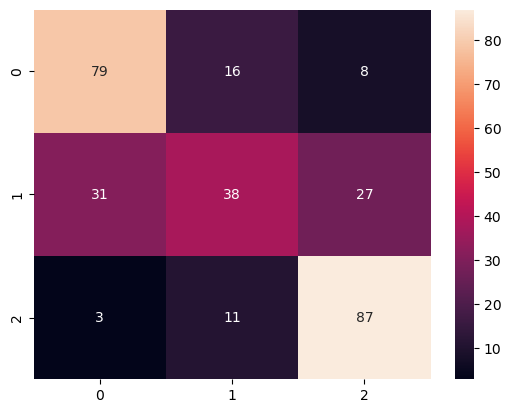

In [812]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

model = LogisticRegression(multi_class="ovr")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True )

# we can increase the accuracy score using parameters tuning GRIDSEARCHCV or RANDOM SEARCHCV


# Logistics for Imbalance Datsets

In [813]:
from sklearn.datasets import make_classification
from collections import Counter

X,y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1,weights=[0.99], random_state=10)
X.shape, y.shape

((1000, 2), (1000,))

In [814]:
Counter(y)

Counter({0: 985, 1: 15})

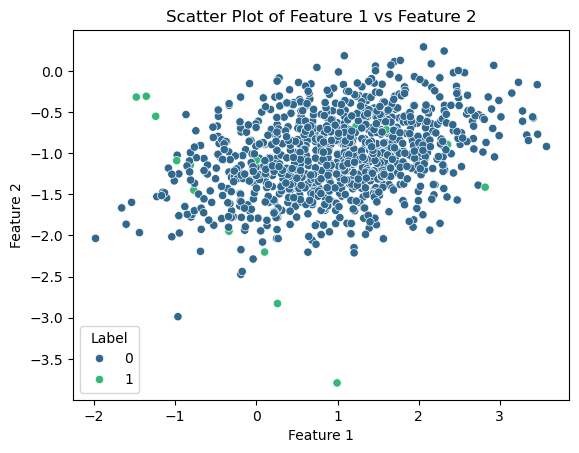

In [815]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert X and y into a DataFrame
data = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
data['Label'] = y  # Add labels as a new column

# Create scatter plot
sns.scatterplot(x="Feature 1", y="Feature 2", hue="Label", data=data, palette="viridis")

# Add title and show the plot
plt.title("Scatter Plot of Feature 1 vs Feature 2")
plt.show()


In [816]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
X_train.shape, y_train.shape

((700, 2), (700,))

In [817]:
model = LogisticRegression()
penalty = ["l1", "l2", "elasticnet"]
c_values = [100,100,1.0,0.1,0.01]
solver = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
# multi_class = {"auto", "ovr", "multinomial"}
class_weight = [{0:w, 1:y} for w in [1,10,50,100] for y in [1,10,50,100]] # importance for 0 and 1 class

In [818]:
params = dict(penalty=penalty, C=c_values, solver=solver, class_weight = class_weight)

In [819]:
from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV

# randomcv = GridSearchCV(estimator=model, param_distributions=params, scoring="accuracy", cv=5)
randomcv = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", cv = cv)


In [820]:
randomcv.fit(X_train, y_train)
y_pred = randomcv.predict(X_test)
# we can remove the warning using some library

c:\Users\sande\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\sande\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\sande\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\sande\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\sande\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\sande\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

In [821]:
print("Acvcuarcy :: ", accuracy_score(y_test, y_pred))


Acvcuarcy ::  0.9833333333333333


In [822]:
randomcv.best_params_

{'C': 0.01,
 'class_weight': {0: 1, 1: 10},
 'penalty': 'l2',
 'solver': 'liblinear'}

# Logistics Regression ROC curve